In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("learn.csv")

In [3]:
data.loanapply_insert_time = pd.to_datetime(data.loanapply_insert_time)
data.insert_time = pd.to_datetime(data.insert_time)
data.company_enter_month = pd.to_datetime(data.company_enter_month)

In [4]:
data.birth_year = pd.to_datetime(data.birth_year)

In [5]:
data.birth_year = data.birth_year.astype("int")/10**9

In [6]:
data.loanapply_insert_time = data.loanapply_insert_time.astype("int")/10**9
data.insert_time = data.insert_time.astype("int")/10**9
data.company_enter_month = data.company_enter_month.astype("int")/10**9

In [7]:
data.loan_limit = np.log10(data.loan_limit + 1)

In [8]:
data.desired_amount = np.log10(data.desired_amount+1)

In [9]:
data.yearly_sincome = np.log10(data.yearly_income+1)

In [10]:
del data["Unnamed: 0"]

In [11]:
data.existing_loan_amt = np.log10(data.existing_loan_amt + 1)

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse

In [13]:
y = data["is_applied"]
x = data.copy()
del x["is_applied"]

In [14]:
c1 = pd.get_dummies(x.income_type)
c2 = pd.get_dummies(x.employment_type)
c2.rename(columns = {"기타":"기타_직업"}, inplace = True)
c3 = pd.get_dummies(x.houseown_type)
c4 = pd.get_dummies(x.purpose)
c4.rename(columns = {"기타": "기타_목적"}, inplace = True)

In [15]:
c = pd.concat([c1, c2, c3, c4], axis = 1)

In [16]:
x.drop(["income_type", "employment_type", "houseown_type", "purpose"], inplace = True, axis= 1)

In [17]:
x = pd.concat([x, c], axis = 1)

In [18]:
x

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,user_id,birth_year,gender,insert_time,credit_score,yearly_income,company_enter_month,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,EARNEDINCOME,EARNEDINCOME2,FREELANCER,OTHERINCOME,PRACTITIONER,PRIVATEBUSINESS,계약직,기타_직업,일용직,정규직,기타가족소유,배우자,자가,전월세,BUSINESS,BUYCAR,BUYHOUSE,ETC,HOUSEDEPOSIT,INVEST,LIVING,SWITCHLOAN,기타_목적,대환대출,사업자금,생활비,자동차구입,전월세보증금,주택구입,투자
0,566528,1.646093e+09,13,123,7.301030,19.1,681184,126230400.0,1.0,1.646093e+09,580.0,6.903090,1.654042e+09,6.000000,0.0,0.0,4.0,7.301030,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,180433,1.646094e+09,19,231,7.204120,15.0,623737,852076800.0,1.0,1.646094e+09,740.0,7.079181,1.643674e+09,6.477121,0.0,0.0,3.0,7.041393,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,180433,1.646094e+09,13,262,7.342423,16.6,623737,852076800.0,1.0,1.646094e+09,740.0,7.079181,1.643674e+09,6.477121,0.0,0.0,3.0,7.041393,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1657888,1.646094e+09,42,216,6.477121,13.5,752985,852076800.0,1.0,1.646094e+09,580.0,7.079181,1.612138e+09,6.477121,0.0,0.0,7.0,7.518514,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,180433,1.646094e+09,1,61,6.477121,14.9,623737,852076800.0,1.0,1.646094e+09,740.0,7.079181,1.643674e+09,6.477121,0.0,0.0,3.0,7.041393,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264381,455157,1.654041e+09,42,258,6.477121,18.0,717233,94694400.0,1.0,1.654041e+09,610.0,8.025306,8.598528e+08,7.698970,0.0,0.0,12.0,8.466868,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10264382,455157,1.654041e+09,46,227,6.477121,17.5,717233,94694400.0,1.0,1.654041e+09,610.0,8.025306,8.598528e+08,7.698970,0.0,0.0,12.0,8.466868,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10264383,455157,1.654041e+09,22,221,6.698970,18.4,717233,94694400.0,1.0,1.654041e+09,610.0,8.025306,8.598528e+08,7.698970,0.0,0.0,12.0,8.466868,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10264384,455157,1.654041e+09,38,16,6.477121,14.5,717233,94694400.0,1.0,1.654041e+09,610.0,8.025306,8.598528e+08,7.698970,0.0,0.0,12.0,8.466868,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
data_dmatrix = xgb.DMatrix(data=x, label= y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 1/6, random_state = 0)

In [21]:
xgreg = xgb.XGBRegressor(objective = 'binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [22]:
xgreg.fit(X_train, Y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='binary:logistic', predictor='auto',
             random_state=0, ...)

In [23]:
preds = xgreg.predict(X_test)

In [24]:
preds

array([0.19491287, 0.19810005, 0.19571885, ..., 0.19868293, 0.23269859,
       0.21025395], dtype=float32)

In [25]:
from sklearn.metrics import f1_score

In [26]:
p = preds > 0.5

In [27]:
f1_score(Y_test, p)

0.0

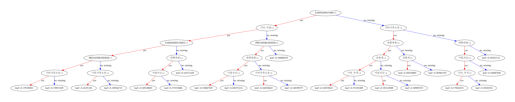

In [28]:
xgb.plot_tree(xgreg, num_trees = 0)
plt.rcParams['figure.figsize'] = [100, 100]

In [31]:
data.is_applied.sum()/len(data.is_applied)

0.05404229731812502

In [32]:
preds > 0.054

array([ True,  True,  True, ...,  True,  True,  True])

In [34]:
f1_score(Y_test, preds > 0.054)

0.10287978450825976